# Import all libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy.stats.stats import pearsonr
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# Load our data

In [2]:
data=pd.read_csv('finaldata.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          102 non-null    object 
 1   Hindex           102 non-null    int64  
 2   GII_Score        102 non-null    float64
 3   population       102 non-null    int64  
 4   number of test   102 non-null    int64  
 5   number of death  102 non-null    int64  
 6   number of case   102 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.7+ KB


In [5]:
data.head()

,Country,Hindex,GII_Score,population,number of test,number of death,number of case
0,United States,2577,60.56,333622477,466110000,476842,35110468
1,United Kingdom,1618,59.78,68367364,343980000,72791,10298828
2,Germany,1429,56.55,84145628,58260000,78443,5430930
3,Italy,1135,45.74,60341753,113540000,63176,4026966
4,Australia,1115,48.35,25990292,43700000,1330,367099


# Dependent variables 

In [3]:
data['Death/population']=data['number of death']/data['population']
data['Case/Population']=data['number of case']/data['population']
data['Test/populaton']=data['number of test']/data['population']
data['Case/Test']=data['number of case']/data['number of test']
data['CFR']=data['number of death']/data['number of case']

# Data normalization

In [4]:
from sklearn.preprocessing import StandardScaler
data2=data[['GII_Score','Hindex','Death/population','Case/Population','Test/populaton',
        'Case/Test','CFR']]
scaler = StandardScaler()
data_norm= scaler.fit_transform(data2)

In [6]:
data_norm = pd.DataFrame(data_norm)

In [8]:
data_norm = data_norm.set_axis(['GII_Score','Hindex','Death/Population','Case/Population','Test/Population','Case/Test','CFR'], axis=1,
                       inplace=False)
data_norm

,GII_Score,Hindex,Death/Population,Case/Population,Test/Population,Case/Test,CFR
0,1.990203,5.315438,0.629533,0.971704,0.000957,-0.327505,-0.315006
1,1.926854,2.937881,0.192476,1.955582,1.519958,-0.972961,-0.804745
2,1.664523,2.469312,0.033666,0.089711,-0.293606,-0.073052,-0.250149
3,0.786569,1.740426,0.171216,0.137258,0.203463,-0.894357,-0.156576
4,0.998545,1.690842,-1.022534,-1.002918,0.119777,-1.279285,-1.063769
...,...,...,...,...,...,...,...
97,-1.113093,-0.820592,-0.350671,-0.733536,-0.522554,1.212688,0.395657
98,-1.271466,-0.810675,-1.052075,-1.284574,-0.579669,0.615701,0.432464
99,-0.889746,-0.885052,-0.884635,-0.821700,-0.504783,0.310170,-0.780425
100,-0.910051,-0.894968,-0.627865,-1.057145,-0.548590,0.609069,1.124802


# statistical analysis

## Pearson correlation

In [9]:
correlation=data_norm.corr()
correlation

,GII_Score,Hindex,Death/Population,Case/Population,Test/Population,Case/Test,CFR
GII_Score,1.000000,0.755753,0.087305,0.543902,0.422839,-0.377036,-0.405256
Hindex,0.755753,1.000000,-0.007424,0.293699,0.163644,-0.238664,-0.276654
Death/Population,0.087305,-0.007424,1.000000,0.524303,0.050118,0.267003,0.545222
Case/Population,0.543902,0.293699,0.524303,1.000000,0.427918,-0.058438,-0.275782
Test/Population,0.422839,0.163644,0.050118,0.427918,1.000000,-0.456429,-0.294974
Case/Test,-0.377036,-0.238664,0.267003,-0.058438,-0.456429,1.000000,0.448840
CFR,-0.405256,-0.276654,0.545222,-0.275782,-0.294974,0.448840,1.000000


## heatmap of pearson correlation

<AxesSubplot:>

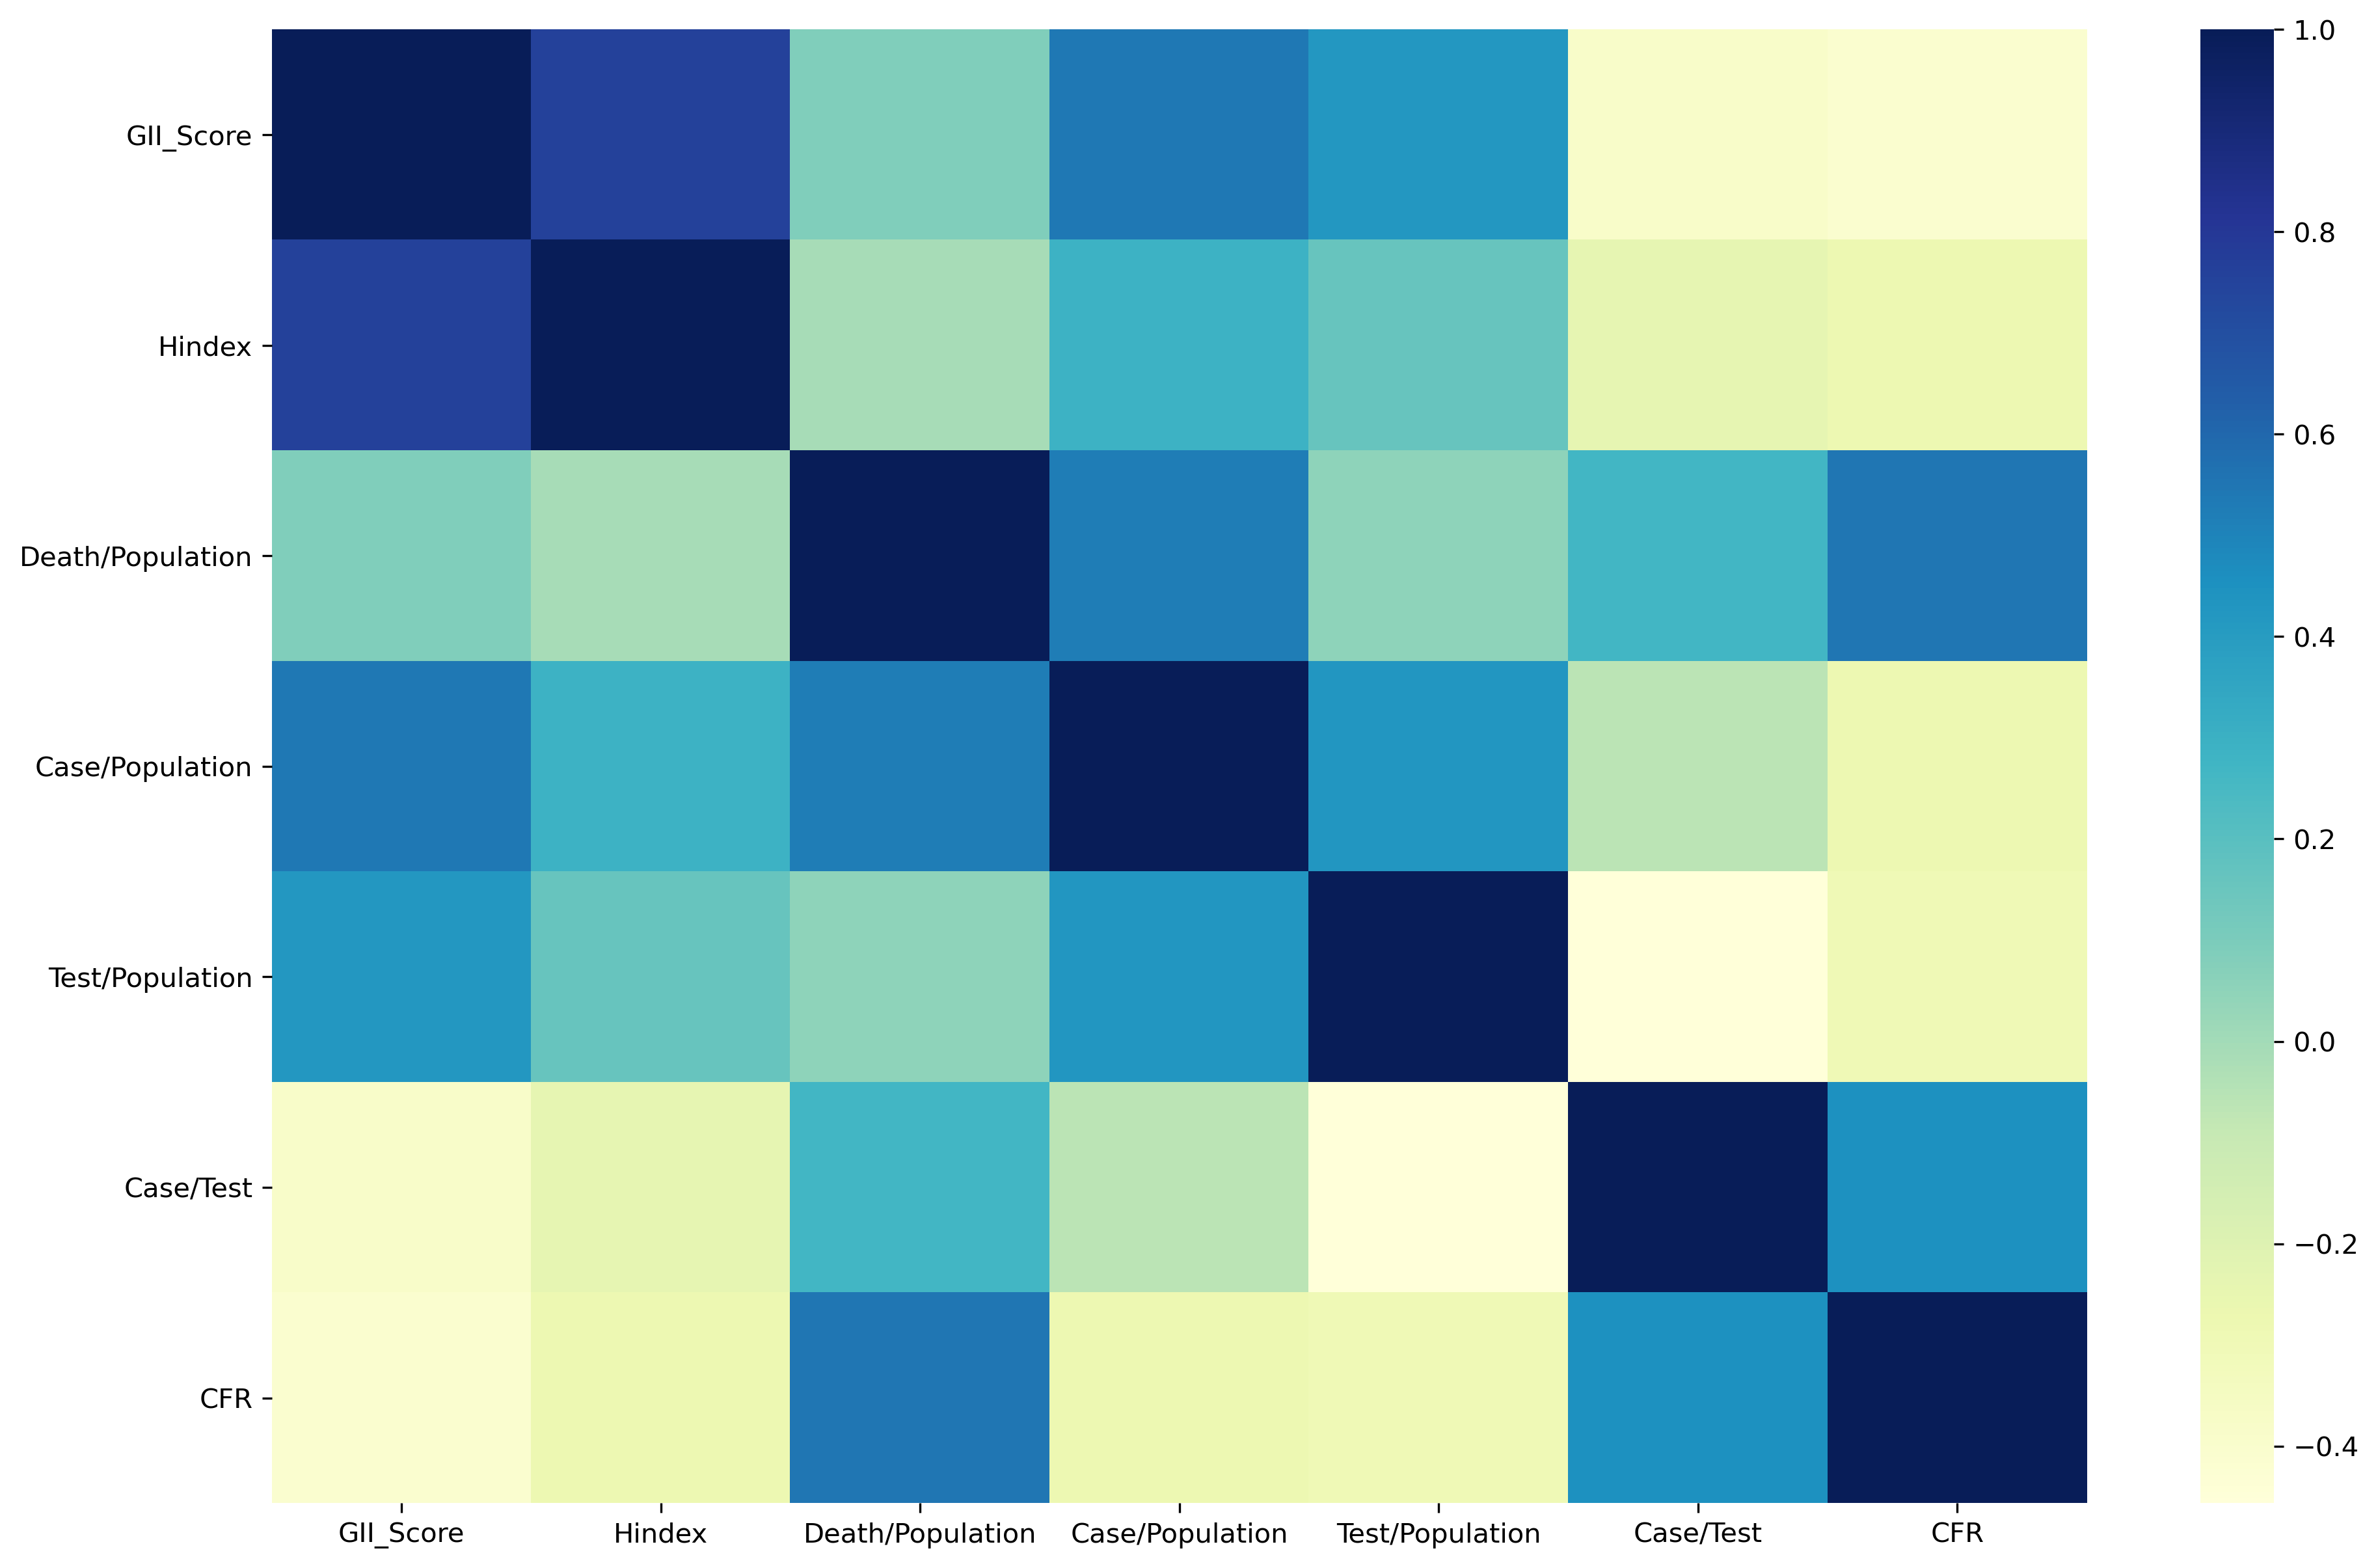

In [11]:
plt.figure(figsize=(15,10),dpi=300)
sb.heatmap(correlation,xticklabels=correlation.columns.values,yticklabels=correlation.columns.values,cmap='YlGnBu')

##  calculating P value

In [102]:
x=data_norm['GII_Score']
y=data_norm['Death/Population']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:       Death/Population   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7681
Date:                Sun, 07 Aug 2022   Prob (F-statistic):              0.383
Time:                        17:11:01   Log-Likelihood:                -144.34
No. Observations:                 102   AIC:                             292.7
Df Residuals:                     100   BIC:                             297.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.123e-16      0.100   3.13e-15      1.0

In [103]:
x=data_norm['GII_Score']
y=data_norm['Case/Population']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Case/Population   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     42.01
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           3.46e-09
Time:                        17:11:02   Log-Likelihood:                -126.84
No. Observations:                 102   AIC:                             257.7
Df Residuals:                     100   BIC:                             262.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-18      0.084   8.27e-17      1.0

In [104]:
x=data_norm['GII_Score']
y=data_norm['Test/Population']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Test/Population   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     21.77
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           9.54e-06
Time:                        17:11:02   Log-Likelihood:                -134.69
No. Observations:                 102   AIC:                             273.4
Df Residuals:                     100   BIC:                             278.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-17      0.091   7.66e-16      1.0

In [105]:
x=data_norm['GII_Score']
y=data_norm['CFR']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CFR   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     19.65
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           2.39e-05
Time:                        17:11:02   Log-Likelihood:                -135.58
No. Observations:                 102   AIC:                             275.2
Df Residuals:                     100   BIC:                             280.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.886e-16      0.091   4.25e-15      1.0

In [106]:
x=data_norm['GII_Score']
y=data_norm['Case/Test']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:              Case/Test   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     16.57
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           9.38e-05
Time:                        17:11:03   Log-Likelihood:                -136.91
No. Observations:                 102   AIC:                             277.8
Df Residuals:                     100   BIC:                             283.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.69e-16      0.093  -6.14e-15      1.0

In [107]:
x=data_norm['Hindex']
y=data_norm['Death/Population']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:       Death/Population   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                  0.005512
Date:                Sun, 07 Aug 2022   Prob (F-statistic):              0.941
Time:                        17:11:03   Log-Likelihood:                -144.73
No. Observations:                 102   AIC:                             293.5
Df Residuals:                     100   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.123e-16      0.100   3.12e-15      1.0

In [108]:
x=data_norm['Hindex']
y=data_norm['Case/Population']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Case/Population   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     9.440
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00274
Time:                        17:11:03   Log-Likelihood:                -140.13
No. Observations:                 102   AIC:                             284.3
Df Residuals:                     100   BIC:                             289.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-18      0.096   7.26e-17      1.0

In [109]:
x=data_norm['Hindex']
y=data_norm['Test/Population']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Test/Population   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.752
Date:                Sun, 07 Aug 2022   Prob (F-statistic):              0.100
Time:                        17:11:03   Log-Likelihood:                -143.35
No. Observations:                 102   AIC:                             290.7
Df Residuals:                     100   BIC:                             295.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e-17      0.099   7.03e-16      1.0

In [110]:
x=data_norm['Hindex']
y=data_norm['Case/Test']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Case/Test   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     6.040
Date:                Sun, 07 Aug 2022   Prob (F-statistic):             0.0157
Time:                        17:11:03   Log-Likelihood:                -141.74
No. Observations:                 102   AIC:                             287.5
Df Residuals:                     100   BIC:                             292.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -5.69e-16      0.097  -5.86e-15      1.0

In [111]:
x=data_norm['Hindex']
y=data_norm['CFR']

import statsmodels.api as sm
X2 = sm.add_constant(x)
est = sm.OLS( y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     8.288
Date:                Sun, 07 Aug 2022   Prob (F-statistic):            0.00488
Time:                        17:11:03   Log-Likelihood:                -140.67
No. Observations:                 102   AIC:                             285.3
Df Residuals:                     100   BIC:                             290.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.886e-16      0.096   4.04e-15      1.0

# Machine learning model

## Clustering
### K_means algorithm 

### Load our data

In [12]:
data=pd.read_csv('finaldata.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          102 non-null    object 
 1   Hindex           102 non-null    int64  
 2   GII_Score        102 non-null    float64
 3   population       102 non-null    int64  
 4   number of test   102 non-null    int64  
 5   number of death  102 non-null    int64  
 6   number of case   102 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.7+ KB



By using K_means algorithm and based on two parameters H index and GII_Score, countries were classified into N clusters.

In [13]:
data['Case/Test']=data['number of case']/data['number of test']
data['CFR']=data['number of death']/data['number of case']
from sklearn.preprocessing import StandardScaler
data2=data[['GII_Score','Hindex']]
scaler = StandardScaler()
x= scaler.fit_transform(data2)

In [14]:
data

,Country,Hindex,GII_Score,population,number of test,number of death,number of case,Case/Test,CFR
0,United States,2577,60.56,333622477,466110000,476842,35110468,0.075327,0.013581
1,United Kingdom,1618,59.78,68367364,343980000,72791,10298828,0.029940,0.007068
2,Germany,1429,56.55,84145628,58260000,78443,5430930,0.093219,0.014444
3,Italy,1135,45.74,60341753,113540000,63176,4026966,0.035467,0.015688
4,Australia,1115,48.35,25990292,43700000,1330,367099,0.008400,0.003623
...,...,...,...,...,...,...,...,...,...
97,Guatemala,102,22.35,18465569,2670328,11294,490347,0.183628,0.023033
98,Madagascar,106,20.40,28871890,229898,766,32565,0.141650,0.023522
99,Dominican Republic,76,25.10,11028532,2063756,1833,247993,0.120166,0.007391
100,El Salvador,72,24.85,6540555,538420,2488,76016,0.141183,0.032730


### Elbow method
In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set.

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'tot.withinss')

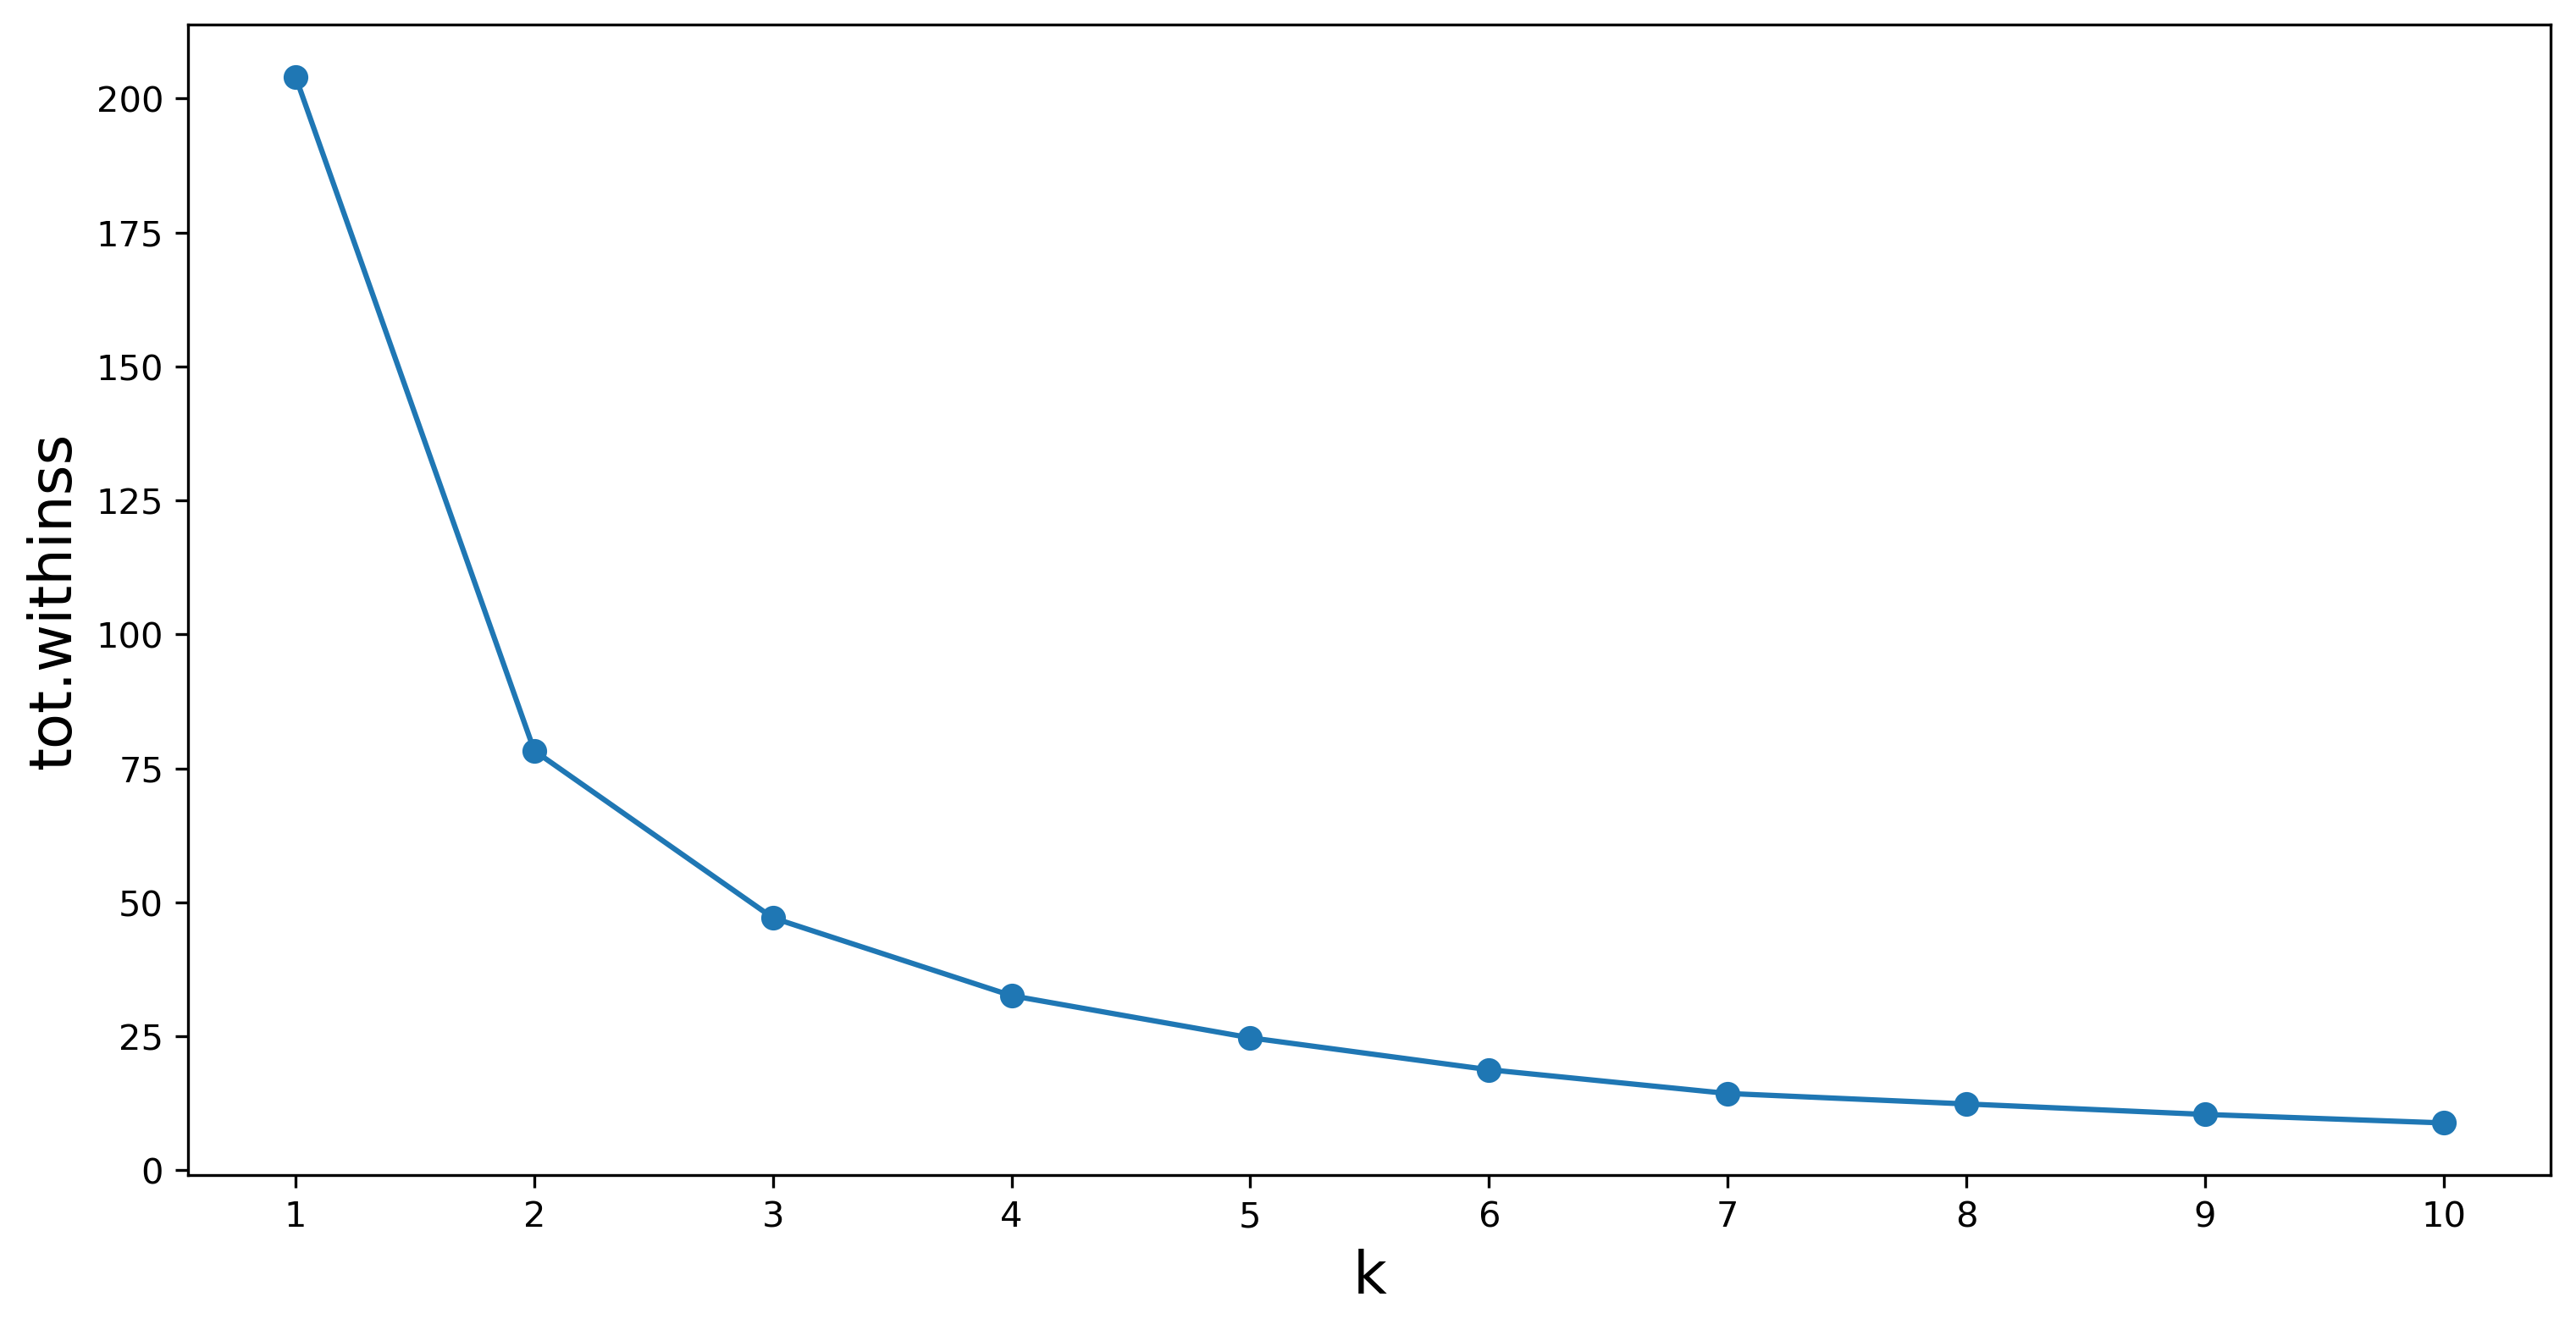

In [15]:
from sklearn.cluster import KMeans
tot_withinss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(x)
    tot_withinss.append(km.inertia_)
plt.figure(figsize=(12,6),dpi=300)
plt.plot(range(1,11),tot_withinss,linestyle='-', marker='o')
plt.xticks(np.arange(min(range(1,11)), max(range(1,11))+1,1.0))
plt.xlabel('k',fontsize=16.5)
plt.ylabel('tot.withinss',fontsize=16.5)

### Fit our model on data

In [16]:
km1=KMeans(n_clusters=3)
#Fitting the input data
km1.fit(x)
#predicting the labels of the input data
y=km1.predict(x)
#adding the labels to a column named label
data["label"] = y


In [17]:
data.to_csv('f11')
data.groupby(data['label']).count()
Clusters=data.groupby(data['label']).mean()
Clusters.to_csv('f22')

In [18]:
Clusters

,Hindex,GII_Score,population,number of test,number of death,number of case,Case/Test,CFR
label,,,,,,,,
0,434.971429,41.506286,7.109819e+07,4.024384e+07,50081.457143,2.429102e+06,0.095440,0.017279
1,183.480000,25.781200,3.303276e+07,5.919488e+06,14539.300000,6.119542e+05,0.114655,0.021504
2,1162.764706,55.050000,5.698072e+07,8.670882e+07,50644.235294,4.599858e+06,0.056419,0.007803


In [19]:

Clusters.sort_values('GII_Score',ascending=True,inplace=True)

### change the name of row

In [20]:
rename = Clusters.set_axis(['1','2','3'], axis=0,
                       inplace=False)
rename

,Hindex,GII_Score,population,number of test,number of death,number of case,Case/Test,CFR
1,183.480000,25.781200,3.303276e+07,5.919488e+06,14539.300000,6.119542e+05,0.114655,0.021504
2,434.971429,41.506286,7.109819e+07,4.024384e+07,50081.457143,2.429102e+06,0.095440,0.017279
3,1162.764706,55.050000,5.698072e+07,8.670882e+07,50644.235294,4.599858e+06,0.056419,0.007803


C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


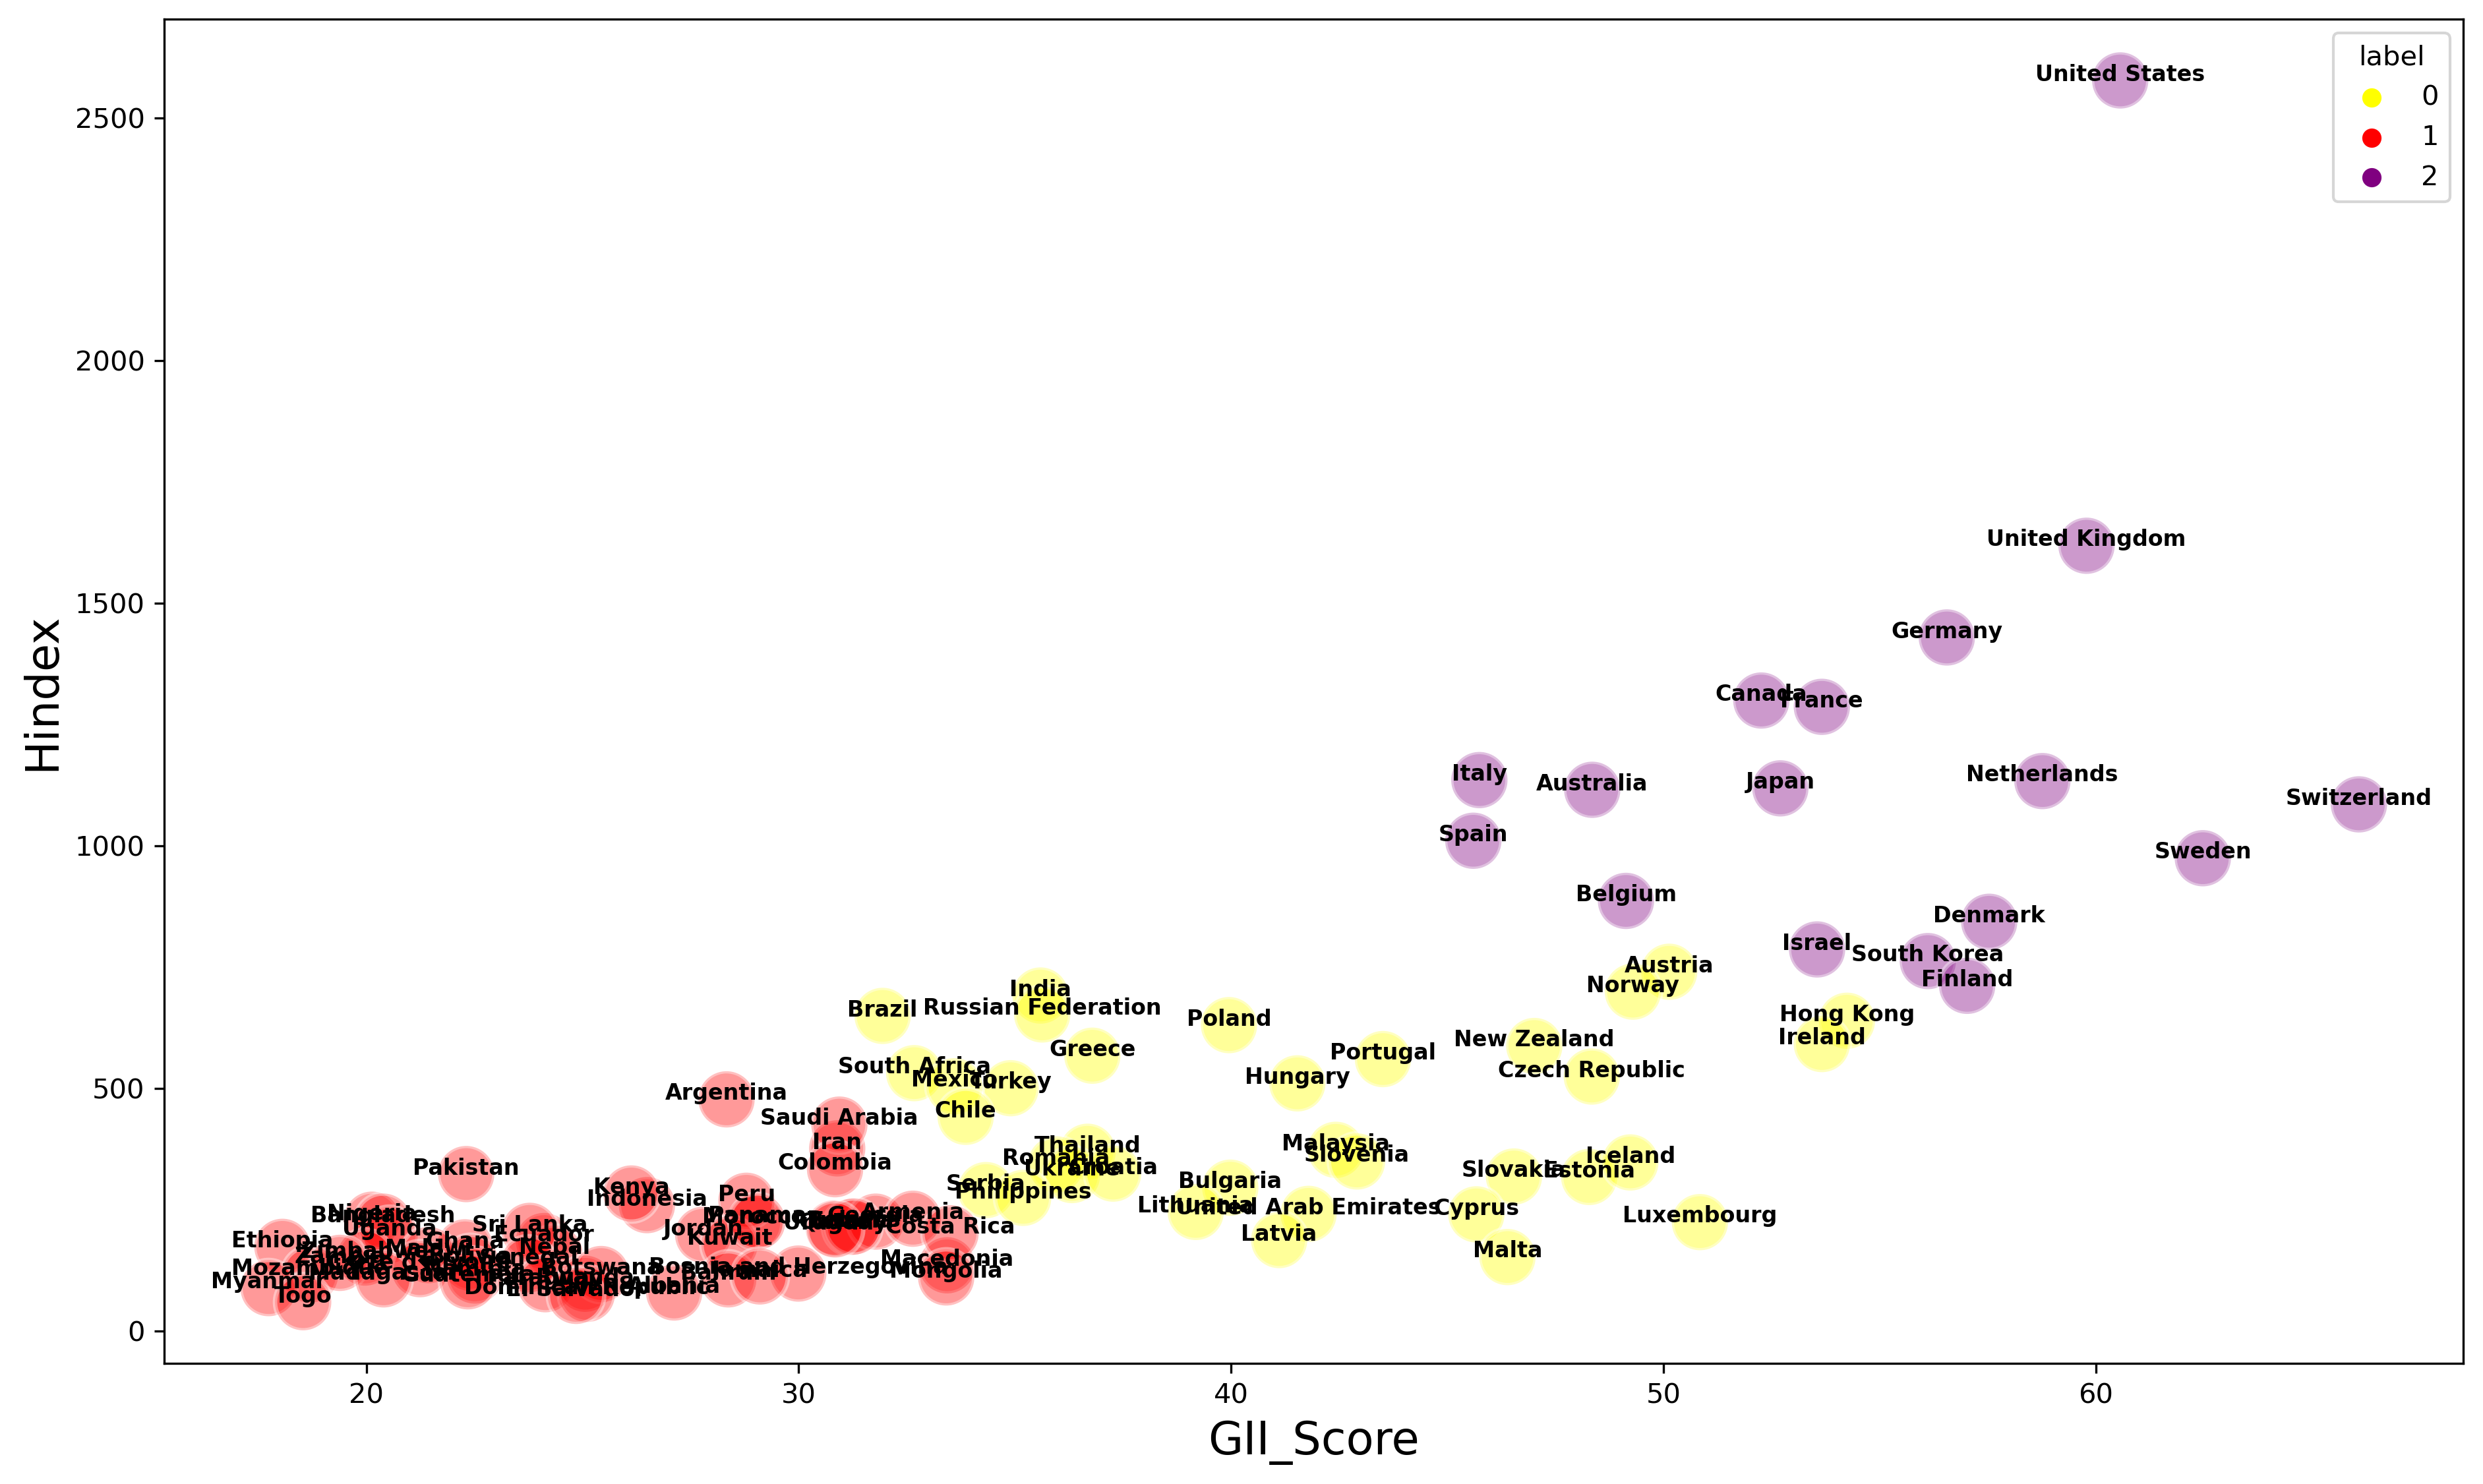

In [21]:
plt.figure(figsize=(15,9),dpi=300)
ax=sns.scatterplot(data.GII_Score ,data.Hindex,hue="label",  
                 palette=['yellow','red','purple'],alpha=0.4, legend='full',data = data  ,s = 420 )
,
for line in range(0,data.shape[0]):
     ax.text(data.GII_Score[line], data.Hindex[line], data.Country[line], horizontalalignment='center', size=8, color='black', weight='semibold')
plt.xlabel('GII_Score',fontsize=16.5)
plt.ylabel('Hindex',fontsize=16.5) 

plt.show()